# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [2]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

import pickle
import pymoc
import xidplus
import numpy as np
%matplotlib inline
from astropy.io import fits
from astropy import wcs
from astropy.table import Table
from astropy.table import Column
import pandas as pd
import glob


## Read tables

In [2]:
cat_gr=Table.read('./data/prior_f5/dmu26_XID+SPIRE_Herschel-Stripe-82_cat_groups.fits')

In [3]:
list_gr = cat_gr[~cat_gr['GroupID'].mask]['GroupID'].tolist()

In [4]:
list_gr = np.unique(np.asarray(list_gr))

In [6]:
cat1 = cat_gr[cat_gr['GroupID'].mask]

In [7]:
len(cat1)

2975169

In [8]:
len(list_gr)

1278

In [9]:
for i in list_gr:
    err = []
    ind = []
    for j, row in enumerate(cat_gr[cat_gr['GroupID']==i]):
        err.append(row['bigger_err'])
    ind = np.where(err==np.min(err))
    row_test = cat_gr[cat_gr['GroupID']==i][ind[0][0]]
    cat1.add_row(row_test)
        

In [10]:
len(cat1)

2976447

In [12]:
cat1.columns

<TableColumns names=('HELP_ID','RA','Dec','F_SPIRE_250','FErr_SPIRE_250_u','FErr_SPIRE_250_l','F_SPIRE_350','FErr_SPIRE_350_u','FErr_SPIRE_350_l','F_SPIRE_500','FErr_SPIRE_500_u','FErr_SPIRE_500_l','Bkg_SPIRE_250','Bkg_SPIRE_350','Bkg_SPIRE_500','Sig_conf_SPIRE_250','Sig_conf_SPIRE_350','Sig_conf_SPIRE_500','Rhat_SPIRE_250','Rhat_SPIRE_350','Rhat_SPIRE_500','n_eff_SPIRE_250','n_eff_SPIRE_500','n_eff_SPIRE_350','Pval_res_250','Pval_res_350','Pval_res_500','GroupID','GroupSize','err_l_250','array','err_u_250','bigger_err')>

In [14]:
cat = cat1['HELP_ID','RA','Dec','F_SPIRE_250','FErr_SPIRE_250_u','FErr_SPIRE_250_l','F_SPIRE_350','FErr_SPIRE_350_u','FErr_SPIRE_350_l','F_SPIRE_500','FErr_SPIRE_500_u','FErr_SPIRE_500_l','Bkg_SPIRE_250','Bkg_SPIRE_350','Bkg_SPIRE_500','Sig_conf_SPIRE_250','Sig_conf_SPIRE_350','Sig_conf_SPIRE_500','Rhat_SPIRE_250','Rhat_SPIRE_350','Rhat_SPIRE_500','n_eff_SPIRE_250','n_eff_SPIRE_500','n_eff_SPIRE_350','Pval_res_250','Pval_res_350','Pval_res_500']

In [15]:
cat[:5]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J013620.014-014943.356,24.08339251715109,-1.8287100724477623,30.60614,38.12857,23.085331,19.783361,26.098831,13.887052,0.21599208,0.51389694,0.0588666,-0.17795463,-1.5469186,-0.30268386,11.646193,10.276865,0.06313332,0.99894655,1.0017217,0.9988749,2000.0,2000.0,1632.0,1.0,1.0,0.976
HELP_J013620.546-015445.967,24.085607663469588,-1.9127687025526363,5.6743026,11.204292,1.8053715,8.812677,14.556383,3.6517694,1.6758593,3.0477543,0.5878429,-0.17795463,-1.5469186,-0.30268386,11.646193,10.276865,0.06313332,0.99893224,1.0007766,0.9998916,2000.0,2000.0,1270.0,1.0,1.0,0.014
HELP_J013621.231-014747.700,24.088462502726564,-1.7965832982453078,4.522036,9.948719,1.2350764,3.7088768,8.029914,1.0086968,0.4974388,1.2554373,0.124834575,-0.17795463,-1.5469186,-0.30268386,11.646193,10.276865,0.06313332,0.99899703,0.99939585,1.0001097,2000.0,2000.0,2000.0,1.0,1.0,0.773
HELP_J013622.200-015545.757,24.092502041673956,-1.9293770171856732,5.6762557,11.734198,1.8610324,4.5357914,9.846347,1.3871516,0.721965,1.6076435,0.24169722,-0.17795463,-1.5469186,-0.30268386,11.646193,10.276865,0.06313332,0.9997857,1.002592,1.0004364,2000.0,2000.0,2000.0,1.0,1.0,0.003
HELP_J013622.298-015026.316,24.092909432212263,-1.8406434212506626,9.443843,15.219443,4.1963444,4.227723,8.525,1.4516349,1.3379589,2.207851,0.5620077,-0.17795463,-1.5469186,-0.30268386,11.646193,10.276865,0.06313332,1.0033163,1.0039217,1.0002868,1279.0,2000.0,2000.0,1.0,1.0,1.0


In [17]:
cat.write('./data/prior_f5/dmu26_XID+SPIRE_Herschel-Stripe-82_cat_clean.fits', overwrite=True)

In [4]:
cat = Table.read('./data/prior_f5/dmu26_XID+SPIRE_Herschel-Stripe-82_cat_clean.fits')

In [18]:
# cat=Table.read('./data/prior_f5/dmu26_XID+SPIRE_Herschel-Stripe-82_cat_clean.fits')
from astropy import units as u
cat['RA'].unit=u.deg
cat['Dec'].unit=u.deg

In [19]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J013620.014-014943.356,24.08339251715109,-1.8287100724477623,30.60614,38.12857,23.085331,19.783361,26.098831,13.887052,0.21599208,0.51389694,0.0588666,-0.17795463,-1.5469186,-0.30268386,11.646193,10.276865,0.06313332,0.99894655,1.0017217,0.9988749,2000.0,2000.0,1632.0,1.0,1.0,0.976
HELP_J013620.546-015445.967,24.085607663469588,-1.9127687025526363,5.6743026,11.204292,1.8053715,8.812677,14.556383,3.6517694,1.6758593,3.0477543,0.5878429,-0.17795463,-1.5469186,-0.30268386,11.646193,10.276865,0.06313332,0.99893224,1.0007766,0.9998916,2000.0,2000.0,1270.0,1.0,1.0,0.014
HELP_J013621.231-014747.700,24.088462502726564,-1.7965832982453078,4.522036,9.948719,1.2350764,3.7088768,8.029914,1.0086968,0.4974388,1.2554373,0.124834575,-0.17795463,-1.5469186,-0.30268386,11.646193,10.276865,0.06313332,0.99899703,0.99939585,1.0001097,2000.0,2000.0,2000.0,1.0,1.0,0.773
HELP_J013622.200-015545.757,24.092502041673956,-1.9293770171856732,5.6762557,11.734198,1.8610324,4.5357914,9.846347,1.3871516,0.721965,1.6076435,0.24169722,-0.17795463,-1.5469186,-0.30268386,11.646193,10.276865,0.06313332,0.9997857,1.002592,1.0004364,2000.0,2000.0,2000.0,1.0,1.0,0.003
HELP_J013622.298-015026.316,24.092909432212263,-1.8406434212506626,9.443843,15.219443,4.1963444,4.227723,8.525,1.4516349,1.3379589,2.207851,0.5620077,-0.17795463,-1.5469186,-0.30268386,11.646193,10.276865,0.06313332,1.0033163,1.0039217,1.0002868,1279.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J013622.331-015528.884,24.09304668396321,-1.9246900119446808,10.699443,17.456553,4.5449157,11.911759,19.290281,4.9461894,0.47545144,1.0760634,0.12573065,-0.17795463,-1.5469186,-0.30268386,11.646193,10.276865,0.06313332,0.9987978,1.0001798,0.99980646,2000.0,2000.0,1620.0,1.0,1.0,0.007
HELP_J013622.896-015448.477,24.095399125262876,-1.9134658814448875,58.591274,66.06346,50.692432,25.006887,33.60116,16.275694,0.5431765,1.2798291,0.16811952,-0.17795463,-1.5469186,-0.30268386,11.646193,10.276865,0.06313332,1.000657,0.99928176,0.9991235,2000.0,2000.0,2000.0,1.0,1.0,0.003
HELP_J013623.125-015138.648,24.09635292818054,-1.860735528419071,3.9426916,8.502632,1.1833059,1.8901863,4.520087,0.5081477,0.4222767,0.9370727,0.119604565,-0.17795463,-1.5469186,-0.30268386,11.646193,10.276865,0.06313332,0.9990887,1.0008343,1.0007302,2000.0,2000.0,2000.0,1.0,1.0,0.049


## Look at Symmetry of PDFs to determine depth level of catalogue

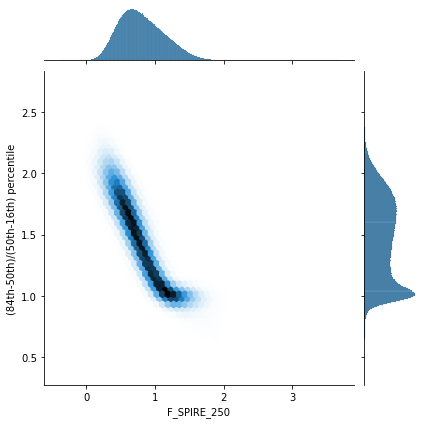

In [7]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')


g.savefig('../../data/figs/sk_SPIRE250_HS82.png', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE250_HS82.pdf', bbox='tight')


For 250 $\mathrm{\mu m}$ depth is ~ 10mJy

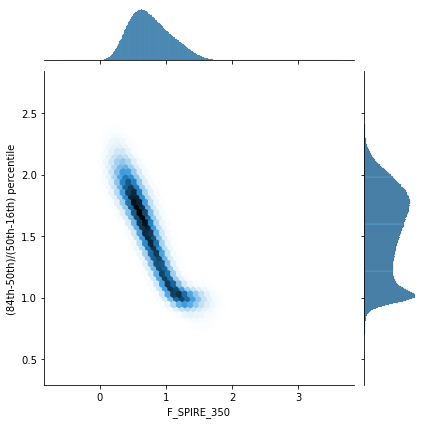

In [8]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')


g.savefig('../../data/figs/sk_SPIRE350_HS82.png', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE350_HS82.pdf', bbox='tight')


For 350 $\mathrm{\mu m}$ depth is ~ 10mJy

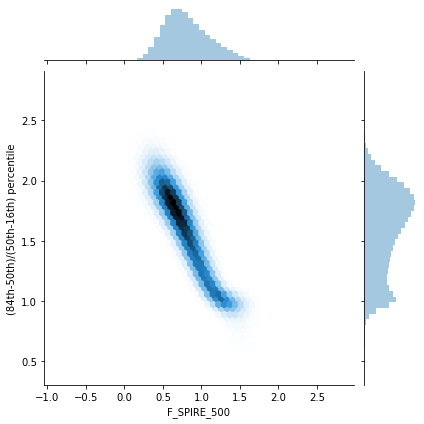

In [22]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE500_HS82.png', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE500_HS82.pdf', bbox='tight')

For 500 $\mathrm{\mu m}$ depth is ~ 12mJy

## Add flag to catalogue

In [24]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [25]:
ind_SERVS_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 10)
ind_SERVS_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 10)
ind_SERVS_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 12)

In [26]:
print(ind_SERVS_250.sum(),ind_SERVS_350.sum(),ind_SERVS_500.sum(),len(cat))

2231447 2356529 2503902 2976447


In [27]:
cat['flag_spire_250'][ind_SERVS_250]=True
cat['flag_spire_350'][ind_SERVS_350]=True
cat['flag_spire_500'][ind_SERVS_500]=True

In [28]:
cat.write('./data/prior_f5/dmu26_XID+SPIRE_Herschel-Stripe-82_cat_20200608.fits', format='fits',overwrite=True)